## Tasks — Regression (week 1):

First, using the book review data, let’s see whether ratings can be predicted as a function of review length, or by using temporal features associated with a review.


2. Train a simple predictor that estimates rating from review length, i.e.,
$$ star \ rating \simeq \theta_0 + \theta_1 \times [review \ length \ in \ characters] $$
Report the values $\theta_0$ and $\theta_1$, and the Mean Squared Error of your predictor (on the entire dataset).

In [35]:
import numpy as np
from urllib.request import urlopen
import scipy.optimize
import random
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [36]:
def parseData(fname):
  for l in open(fname):
    yield eval(l)

In [37]:
data = list(parseData("data/review/fantasy_10000.json"))

In [38]:
data[1]

{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'book_id': '5577844',
 'review_id': '52c8ac49496c153e4a97161e36b2db55',
 'rating': 5,
 'review_text': 'A beautiful story. Neil Gaiman is truly a unique storyteller. I did a combo of reading and listening to this story, and Neil is great at reading as well. I got interested in this book after seeing the movie, which I really enjoyed. The book is similar - maybe a bit more poetic - but I think the plot in the movie is a bit improved (not much, but a bit). \n I imagine this book came about because Neil read the below poem that he includes in the beginning, and then he invented a plot around it. The result is the book reads like a epic poem - it\'s creative, magical, and really, just right. \n Go and catch a falling star, \n Get with child a mandrake root, \n Tell me where all past years are, \n Or who cleft the devil\'s foot, \n Teach me to hear mermaids singing, \n Or to keep off envy\'s stinging, \n And find \n What wind \n Serves to adva

In [39]:
def feature(datum):
  feat = [1]
  feat.append(len(datum['review_text']))
  return feat

In [40]:
X = np.matrix([feature(d) for d in data])

In [41]:
y = np.matrix([d['rating'] for d in data]).T

In [42]:
model=sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X,y)

LinearRegression(fit_intercept=False)

In [43]:
theta=model.coef_
theta

array([[3.68568136e+00, 6.87371675e-05]])

So $\theta_0$ is 3.68568136 and $\theta_1$ is $6.87371675 \times 10^{-5}$

In [44]:
y_estimate=model.predict(X)

In [45]:
y_estimate

array([[3.82906709],
       [3.79023059],
       [3.79009311],
       ...,
       [3.69221139],
       [3.68588757],
       [3.74424542]])

In [46]:
MSE=(np.square(np.subtract(y, y_estimate))).mean()

In [47]:
MSE

1.5522086622355378

So $MSE$ is 1.5522086622355378

3. Extend your model to include (in addition to the length) features based on the time of the review. 
Using a one-hot encoding for the weekday and year, write down feature vectors for the first two examples


In [48]:
import dateutil.parser

In [49]:
weekday_set=set(dateutil.parser.parse(d['date_added']).weekday() for d in data)

In [50]:
year_set=set(dateutil.parser.parse(d['date_added']).year for d in data)

In [51]:
weekday_set

{0, 1, 2, 3, 4, 5, 6}

In [52]:
year_set

{2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017}

We can see that there are 7 different weekdays and 12 different years in the data. Then we apply one-hot encoding for weekday and year.

In [53]:
def feature(datum):
  feat = [1]
  feat.append(len(datum['review_text']))
  t=dateutil.parser.parse(datum['date_added'])
  weekday=t.weekday();
  year=t.year;

  x1=[0,0,0,0,0,0]
  if weekday!=1:
    x1[weekday-1]=1
  feat.extend(x1)

  x2=[0,0,0,0,0,0,0,0,0,0,0]
  if year!=2006:
    x2[year-2007]=1
  feat.extend(x2)

  return feat

In [54]:
X = np.matrix([feature(d) for d in data])

In [55]:
[X[0],X[1]]

[matrix([[   1, 2086,    0,    0,    0,    0,    0,    1,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    1]]),
 matrix([[   1, 1521,    0,    1,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    1,    0,    0,    0]])]

Therefore feature vectors for the first two examples are [1, 2086, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] and [1, 1521, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

4. Train models that 
    

*   use the weekday and year values directly as features

In [56]:
def feature(datum):
  feat = [1]
  feat.append(len(datum['review_text']))
  t=dateutil.parser.parse(datum['date_added'])
  weekday=t.weekday();
  year=t.year;
  feat.append(weekday)
  feat.append(year)

  return feat

In [57]:
X = np.matrix([feature(d) for d in data])

In [58]:
y = np.matrix([d['rating'] for d in data]).T

In [59]:
model=sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X,y)

LinearRegression(fit_intercept=False)

In [60]:
y_estimate=model.predict(X)

In [61]:
MSE=(np.square(np.subtract(y, y_estimate))).mean()

In [62]:
MSE

1.536774049870523

The first model's MSE is 1.536774049870523.



*   use the one-hot encoding from Question 3.



In [63]:
def feature(datum):
  feat = [1]
  feat.append(len(datum['review_text']))
  t=dateutil.parser.parse(datum['date_added'])
  weekday=t.weekday();
  year=t.year;

  x1=[0,0,0,0,0,0]
  if weekday!=1:
    x1[weekday-1]=1
  feat.extend(x1)

  x2=[0,0,0,0,0,0,0,0,0,0,0]
  if year!=2006:
    x2[year-2007]=1
  feat.extend(x2)

  return feat

In [73]:
X = np.matrix([feature(d) for d in data])

In [74]:
y = np.matrix([d['rating'] for d in data]).T

In [75]:
model=sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X,y)

LinearRegression(fit_intercept=False)

In [76]:
y_estimate=model.predict(X)

In [77]:
MSE=(np.square(np.subtract(y, y_estimate))).mean()

In [78]:
MSE

1.5130741681414206

The second model's MSE is 1.5130741681414206.

5. Repeat the above question, but this time split the data into a training and test set. You should split the data randomly into 50%/50% train/test fractions. Report the MSE of each model separately on the training and test sets.

For model that uses the weekday and year values directly as features:

In [36]:
def feature(datum):
  feat = [1]
  feat.append(len(datum['review_text']))
  t=dateutil.parser.parse(datum['date_added'])
  weekday=t.weekday();
  year=t.year;
  feat.append(weekday)
  feat.append(year)

  return feat

In [37]:
X = np.matrix([feature(d) for d in data])

In [38]:
y = np.matrix([d['rating'] for d in data]).T

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [40]:
model=sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [41]:
y_train_estimate=model.predict(X_train)

In [42]:
MSE_train=(np.square(np.subtract(y_train, y_train_estimate))).mean()
MSE_train

1.5390152353610758

So MSE on the train set is 1.5390152353610758.

In [43]:
y_test_estimate=model.predict(X_test)

In [44]:
MSE_test=(np.square(np.subtract(y_test, y_test_estimate))).mean()
MSE_test

1.5350975979293981

So MSE on the test set is 1.5350975979293981.

For model that uses use the one-hot encoding from Question 3:

In [45]:
def feature(datum):
  feat = [1]
  feat.append(len(datum['review_text']))
  t=dateutil.parser.parse(datum['date_added'])
  weekday=t.weekday();
  year=t.year;

  x1=[0,0,0,0,0,0]
  if weekday!=1:
    x1[weekday-1]=1
  feat.extend(x1)

  x2=[0,0,0,0,0,0,0,0,0,0,0]
  if year!=2006:
    x2[year-2007]=1
  feat.extend(x2)

  return feat

In [46]:
X = np.matrix([feature(d) for d in data])

In [47]:
y = np.matrix([d['rating'] for d in data]).T

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [49]:
model=sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [50]:
y_train_estimate=model.predict(X_train)

In [51]:
MSE_train=(np.square(np.subtract(y_train, y_train_estimate))).mean()
MSE_train

1.5033759076150912

So MSE on the train set is 1.5033759076150912.

In [52]:
y_test_estimate=model.predict(X_test)

In [53]:
MSE_test=(np.square(np.subtract(y_test, y_test_estimate))).mean()
MSE_test

1.5284136349591855

So MSE on the train set is 1.5284136349591855.

6. Show that for a trivial predictor, i.e., $y = θ_0$, the best possible value of $θ_0$ in terms of the Mean Absolute Error is the median (i.e., the average value of the label $y$). Hint: compute the derivative of the model’s MSE and solve for $θ_0$.

Proof: 

the derivative of the model's MAE(Mean Absolute Error) is:
$$
\frac{\partial \sum |\theta_0 - y|}{\partial \theta_0}
$$
To get the best possible value of $\theta_0$, we need that derivative equals 0. Let $n_1$ be the number of y that is smaller than $\theta_0$, and Let $n_2$ be the number of y that is larger than $\theta_0$, then we have:
$$
\frac{\partial |\theta_0 - y|}{\partial \theta_0}=1
\ when \ y<\theta_0
\\
\frac{\partial |\theta_0 - y|}{\partial \theta_0}=-1
\ when \ y>\theta_0
\\
\frac{\partial |\theta_0 - y|}{\partial \theta_0}=0
\ when \ y=\theta_0
$$
To make the derivative of the model's MAE be 0, we have:
$$
n1=n2
$$
Therefore, the the best possible value of $θ_0$ in terms of the Mean Absolute Error is the median.

## Tasks — Classification (week 2):

In this question, using the beer review data, we’ll try to predict ratings (positive or negative) based on char- acteristics of beer reviews. Load the 50,000 beer review dataset, and construct a label vector by considering whether a review score is four or above.

7. Fit a logistic regressor that estimates the binarized score from review length, i.e.,
$$
p(rating \ is \ positive)\simeq \sigma(\theta_0+\theta_1 \times [length])
$$
Using the class weight=’balanced’ option, report the True Positive, True Negative, False Positive, False Negative, and Balanced Error Rates of the predictor.



In [54]:
def parseDataFromURL(fname):
  for l in urlopen(fname):
    yield eval(l)

In [55]:
data = list(parseDataFromURL("https://cseweb.ucsd.edu/classes/fa21/cse258-b/data/beer_50000.json"))

In [56]:
data[1]

{'review/appearance': 3.0,
 'beer/style': 'English Strong Ale',
 'review/palate': 3.0,
 'review/taste': 3.0,
 'beer/name': 'Red Moon',
 'review/timeUnix': 1235915097,
 'beer/ABV': 6.2,
 'beer/beerId': '48213',
 'beer/brewerId': '10325',
 'review/timeStruct': {'isdst': 0,
  'mday': 1,
  'hour': 13,
  'min': 44,
  'sec': 57,
  'mon': 3,
  'year': 2009,
  'yday': 60,
  'wday': 6},
 'review/overall': 3.0,
 'review/text': 'Dark red color, light beige foam, average.\tIn the smell malt and caramel, not really light.\tAgain malt and caramel in the taste, not bad in the end.\tMaybe a note of honey in teh back, and a light fruitiness.\tAverage body.\tIn the aftertaste a light bitterness, with the malt and red fruit.\tNothing exceptional, but not bad, drinkable beer.',
 'user/profileName': 'stcules',
 'review/aroma': 2.5}

In [57]:
def feature(datum):
  feat = [1]
  feat.append(len(datum['review/text']))
  return feat

In [58]:
X = [feature(d) for d in data]

In [59]:
y=[d['review/overall']>=4 for d in data]

In [60]:
model = sklearn.linear_model.LogisticRegression(fit_intercept=False, class_weight='balanced')
model.fit(X,y)

LogisticRegression(class_weight='balanced', fit_intercept=False)

In [61]:
predictions=model.predict(X)
predictions

array([False, False, False, ..., False,  True, False])

In [62]:
TP = sum([(p and l) for (p,l) in zip(predictions, y)])
TP

14201

In [63]:
FP = sum([(p and not l) for (p,l) in zip(predictions, y)])
FP

5885

In [64]:
TN = sum([(not p and not l) for (p,l) in zip(predictions, y)])
TN

10503

In [65]:
FN = sum([(not p and l) for (p,l) in zip(predictions, y)])
FN

19411

In [66]:
TPR = TP / (TP + FN)
TPR

0.4224979174104487

In [67]:
TNR = TN / (TN + FP)
TNR

0.6408957773980962

In [68]:
FPR = FP / (TN + FP)
FPR

0.35910422260190383

In [69]:
FNR = FN / (TP + FN)
FNR

0.5775020825895514

In [70]:
BER = 1/2*(FPR+FNR)
BER

0.46830315259572763

Therefore True Positive Rate is 0.4224979174104487 \\
True Negative Rate is 0.6408957773980962 \\
False Positive Rate is 0.35910422260190383 \\
False Negative Rate is 0.6834377860714034 \\
Balanced Error Rate is 0.46830315259572763.

8. Plot the precision@K of your classifier for K = {1 . . . 10000}

In [71]:
import matplotlib.pyplot as plt

In [72]:
scores = model.decision_function(X)

In [73]:
scores_labels = list(zip(scores, y))

In [74]:
scores_labels.sort(reverse = True)

In [75]:
sorted_labels = [x[1] for x in scores_labels]

In [76]:
K = np.arange(1,10001,1)

In [77]:
precision = [sum(sorted_labels[:k]) / k for k in K]

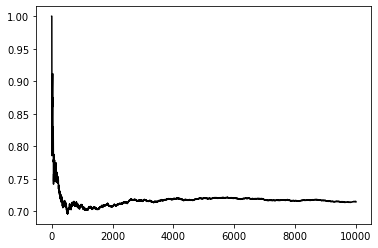

In [78]:
plt.plot(K, precision, color='black')

9. Our precision@K plot from Question 8 only measures precision with regard to the positive class. For
this type of binary classification, we may be equally interested in the classifier’s accuracy for both the
positive and negative classes. Recompute confidence scores for your classifier so that the ‘most confi-
dent’ predictions include either the most confident positive or the most confident negative predictions. 
the classifier has the correct label (either ‘positive’ or ‘negative’) among the K most confident entries. Report this precision@K for K ∈ {1, 100, 10000} and include a plot as in Question 8.

In [79]:
probas = model.predict_proba(X)
probas

array([[0.53943312, 0.46056688],
       [0.53274483, 0.46725517],
       [0.52763255, 0.47236745],
       ...,
       [0.50598628, 0.49401372],
       [0.47583848, 0.52416152],
       [0.52295589, 0.47704411]])

In [80]:
new_scores=[abs(proba[1]-0.5) for proba in probas]

In [81]:
y_estimate=model.predict(X)

In [82]:
scores_labels = list(zip(new_scores, y, y_estimate))

In [83]:
scores_labels.sort(key=lambda elem: elem[0], reverse = True)

In [84]:
sorted_labels = [x[1]==x[2] for x in scores_labels]

In [85]:
K = np.arange(1,10001,1)

In [86]:
precision = [sum(sorted_labels[:k]) / k for k in K]

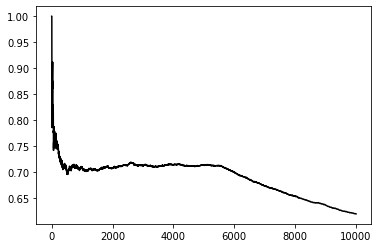

In [87]:
plt.plot(K, precision, color='black')

In [88]:
precision_1=sum(sorted_labels[:1]) / 1
precision_1

1.0

In [89]:
precision_100=sum(sorted_labels[:100]) / 100
precision_100

0.75

In [90]:
precision_10000=sum(sorted_labels[:10000]) / 10000
precision_10000

0.6196

So precision@1 is 1.0, precision@100 is 0.75, precision@10000 is 0.6196.